组合投资策略

为什么需要组合投资？如果你玩过股票（当然，我是不碰的）就会知道一个道理：“永远不要把鸡蛋放在同一个篮子里”。学会分散你的资产配置很重要，你会把你的资产分一些到不动产，分一些到古玩字画，分一些到黄金，分一些到石油，再分一些去买股票……这样某一方面亏了其他方面可以帮忙赚回来。几十年前有这样一批赌徒，他们将自己的全部身家都压在了澳门或者拉斯维加斯的赌场身上，最后一夜之间倾家荡产，这样的例子我见过，读者即使没见过看电视应该也看到过。学会分散你的资产会使你的投资不至于亏空的那么难看。

假设你现在持有的本金为单位1，在市场上进行投资选股你需要做的事情有两个：第一，从一大片股票当中选择你眼里的潜力股去投资；第二，为你的每支股票要投多少确定一个比例。你的目标很简单，是希望在下次套现的时候股票能够赚麻，所以你的投资策略与你的周期有关。比如你买股票一周以后就套现，或者一年以后再观察，是两种不同的策略。从上帝视角来看，这一问题理应使用动态规划去建模；但从现实情况出发，没人能够知道股票一周以后涨多少或者跌多少，你只能基于时间序列方法进行预测。预测出来以后怎么做呢？靠的是投资组合策略。

    注意：这几个投资方法是在实战中最基础的方法，但风险预测同样是投资过程中重要的一环。风险并不一定是随时间的一个常量哟！

现在我以2022年美赛C题为例，现在就考虑黄金和比特币两种产品做组合投资。

马科维茨均值-方差理论被广泛用于解决最优投资组合选择问题。该理论主要通过研究各资产的预期收益、方差和协方差来确定最优投资组合。这也是第一次将数理统计方法引入投资组合理论。

马科维兹理论认为，股票的风险和收益可以通过一支股票时间序列的统计特性来描述。其中，风险可以由股票的方差或VaR来进行描述，但本质上还是通过方差来描述一支股票的风险。风险越大，赔本或者盈利的幅度也就越大，这也就像赌石中的“一刀豪宅一刀命根”。而收益则通过期望来衡量，也就是收益的平均水平越大、越稳定于一个较高的平均水平我们越开心，因为稳赚不赔。但是在计算收益的时候要注意，是套现的时候手持股票的价格与当时投资的时候投入成本的一个差额。

协方差是因为不同的市场检间有互相干扰 协方差 = 第一个变量的方差 * 第二个变量的方差 * 相关系数

多目标变为单目标就是引入常数套，线性组合

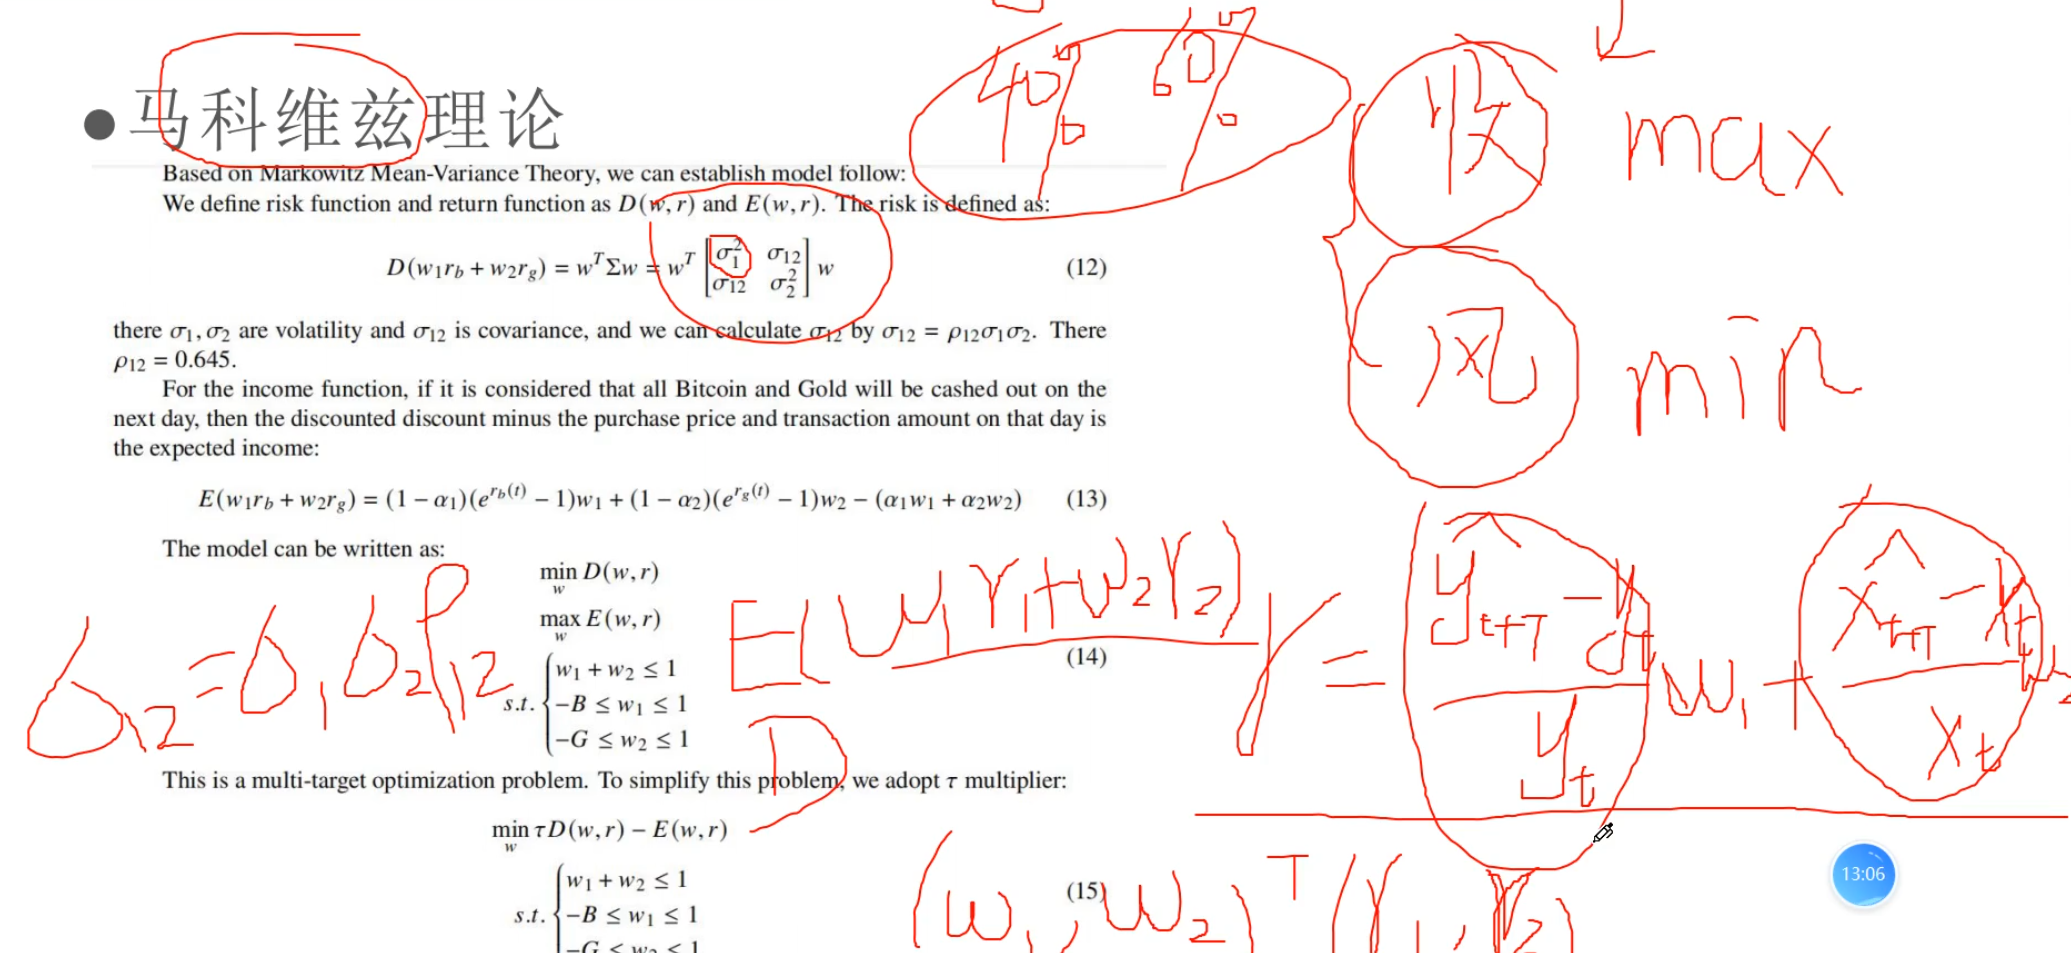

In [1]:
from IPython.display import Image
Image(filename="C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-08-03 135432.png")

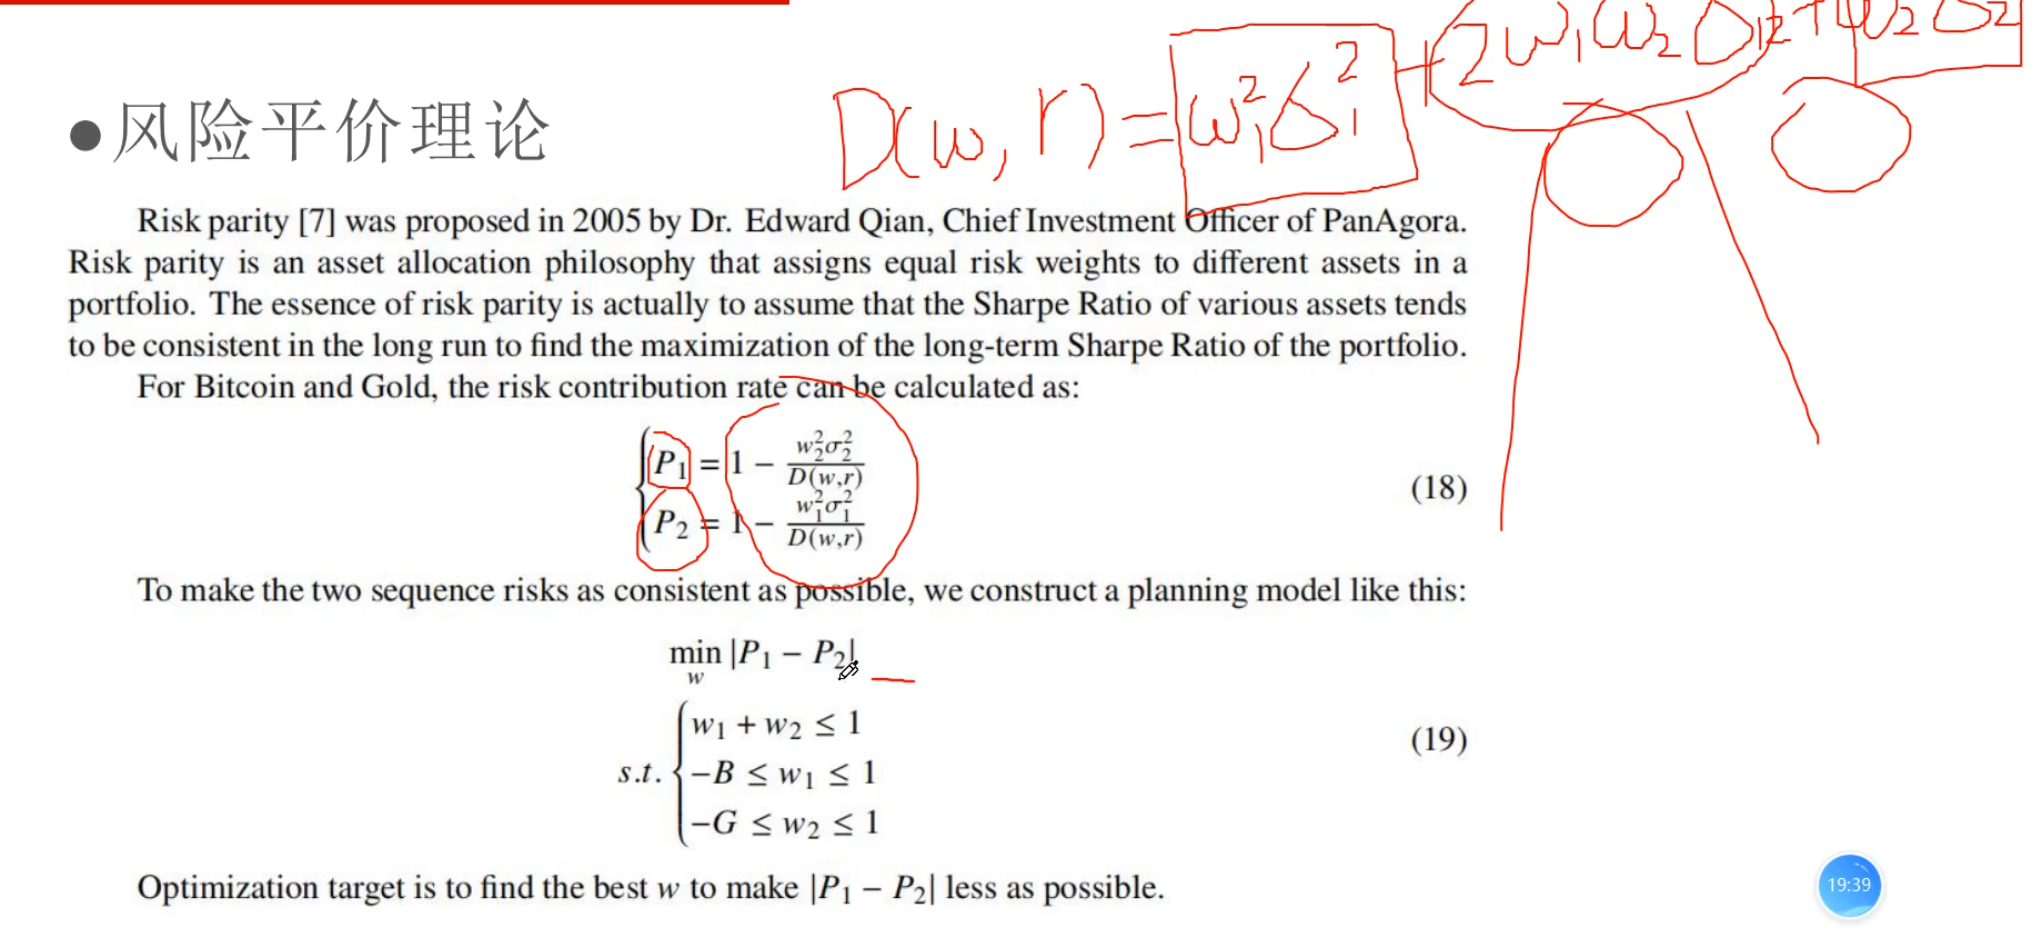

In [2]:
from IPython.display import Image
Image(filename="C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-08-03 140102.png")

尽量是所有投资的风险相等，可以做成平方和，减去绝对值。

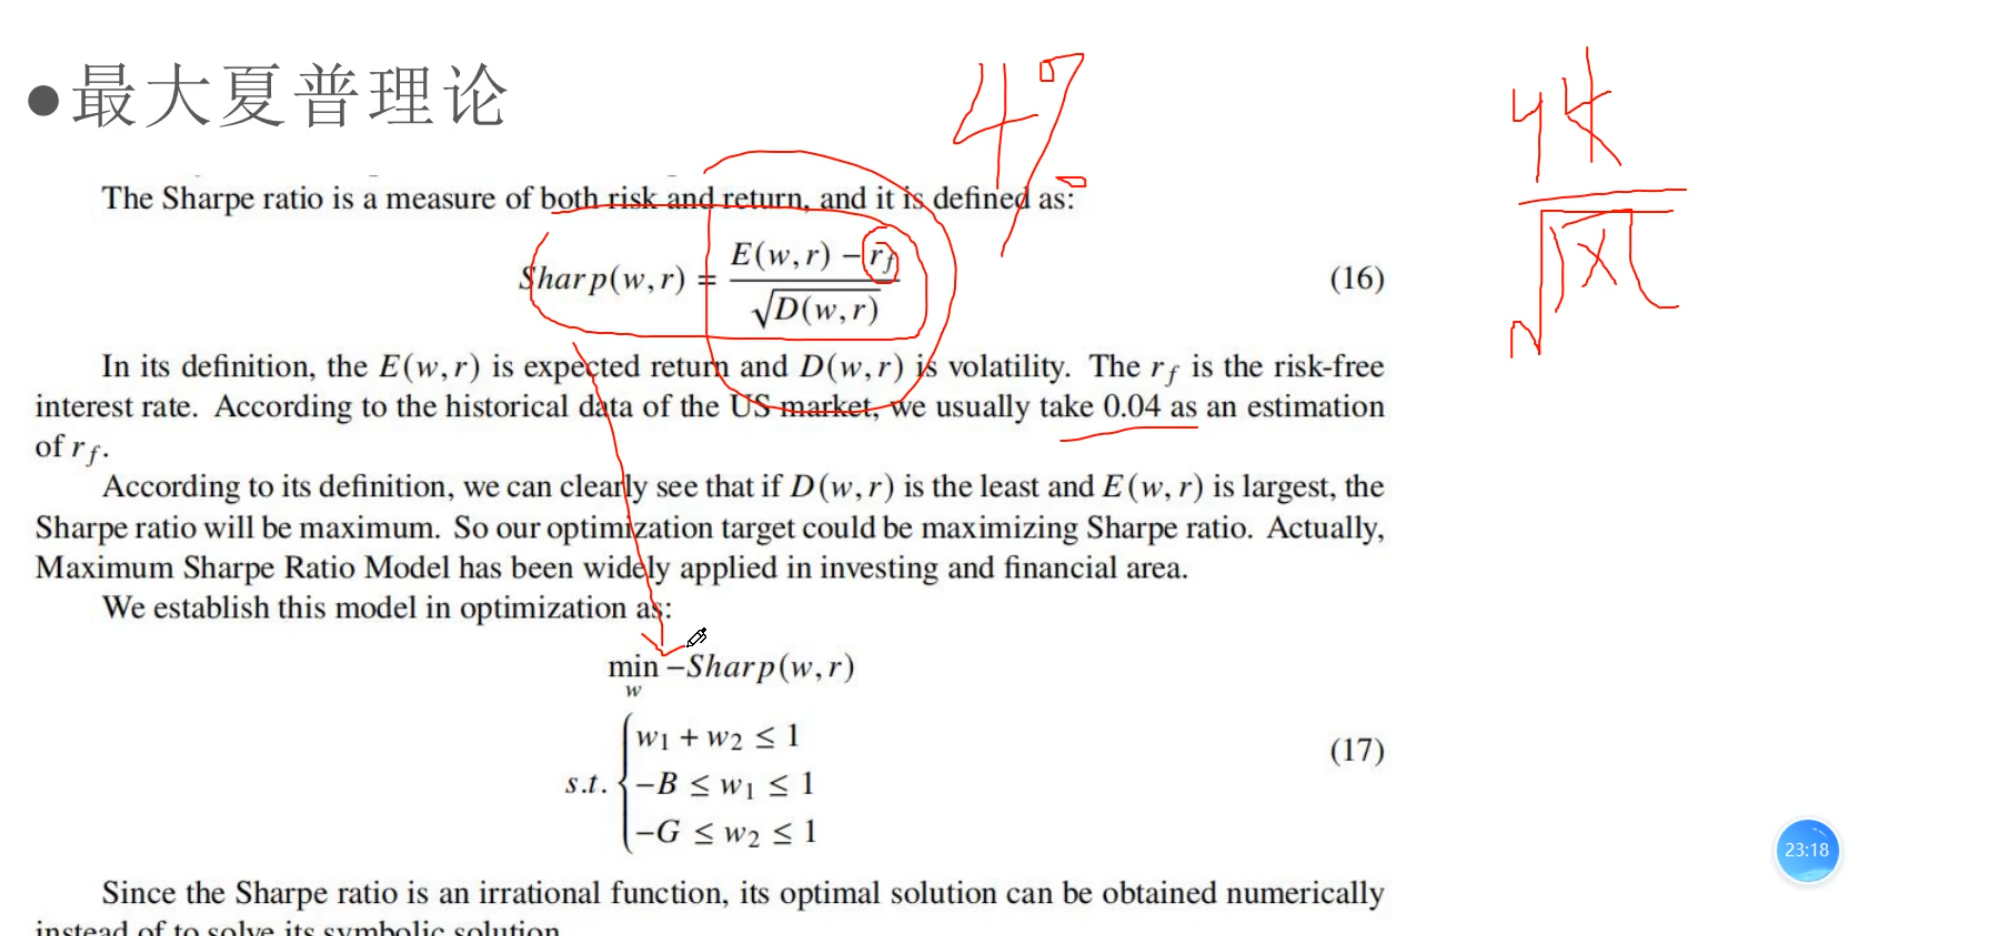

In [5]:
from IPython.display import Image
Image(filename="C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-08-03 140430.png")


第一式子就是风险的式子，收入 - 无风险概率/风险开根号，最大的时候，风险最小

In [ ]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt
data = 
'''可以用ARIMA法预测'''
a1 = 0.98
a2 = 0.99
####马科维兹优化
def E(w,t=0):
    return a1*(data[col1][t+1]/data[col1][t])*w[0]+a2*(data[col2][t+1]/data[col2][t])*w[1]-1.02*w[0]-1.01*w[1]
def D(w,t=0):
    return data['predict_value'][t+1]*w[0]*w[0]+data['predict_value'][t+1]*w[1]*w[1] + 2*0.645*data['predict_value'][t+1]*w[0]*w[1]
def func(w,t=0):
    return -E(w,t) + 10*D(w,t)
####最大夏普优化
def sharp(w,t=0):
    return -((E(w,t) /(w[0]+w[1])-0.04)/np.sqrt(D(w,t)))
####风险平价优化
def risk(w,t=0):
    return abs(data['predict_value'][t+1]*w[0]**2 - data['predict_value'][t+1]*w[1]**2)/D(w,t)
Er1 = []
Er2 = []
Er3 = []
strategy = []
for t in range(data.shape[0]-1): #时间戳
    cons = ({ 'type':'ined','fun':lambda w:E(w,t)+1},
              {'type':'ined','fun':lambda w:-w[0]-w[1]-1} 
        )
    res1 = opt.minimize(func,[0.1,0.1],method='SLSQP',constraints=cons,bounds=((0.1,1),(0.1,1)),options={'disp': False})
    res2 = opt.minimize(sharp,[0.1,0.1],method='SLSQP',bounds=((0.1,1),(0.1,1)),options={'disp': False},constraints=cons)
    res3 = opt.minimize(risk,[0.1,0.1],method='SLSQP',bounds=((0.1,1),(0.1,1)),options={'disp': False},constraints=cons)
    w1 = res1.x
    w2 = res2.x
    w3 = res3.x
    strategy.append(w3)
    e1 = a1*(data[col1][t+1]/data[col1][t])*w[0]+a2*(data[col2][t+1]/data[col2][t])*w1[1]-1.02*w1[0]-1.01*w1[1]
    Er1.append(-e1)
    e2 = a1*(data[col1][t+1]/data[col1][t])*w[0]+a2*(data[col2][t+1]/data[col2][t])*w2[1]-1.02*w2[0]-1.01*w2[1]
    Er2.append(-e2)
    e3 = a1*(data[col1][t+1]/data[col1][t])*w[0]+a2*(data[col2][t+1]/data[col2][t])*w3[1]-1.02*w3[0]-1.01*w3[1]
    Er3.append(-e3)